# 00 – Setup and Data Check
#
# Project: Predictive Modeling for Drug Discovery via Virtual Screening
# Student: Milica Jeftić (ID: 89211255)
# Date: January 2026
# Dataset: Kaggle – Drug Discovery Virtual Screening Dataset
#
# --------------------------------------------------------------------
#
# Goal of This Notebook
#
# This notebook initializes the environment, loads the raw dataset, and
# performs basic data quality checks. The objectives are:
#
# 1. Environment Setup
#    - Import required libraries and configure the analysis environment
#
# 2. Data Loading
#    - Load the raw dataset from data/raw/
#
# 3. Initial Exploration
#    - Inspect dataset shape, column names, and data types
#
# 4. Quality Assessment
#    - Identify missing values, duplicate records, and potential anomalies
#
# 5. Target Analysis
#    - Examine the distribution of activity labels
#      (0 = inactive, 1 = active)
#
# NOTE:
# No preprocessing or modeling is performed in this notebook.
# The purpose is to establish a baseline understanding of the raw data.
#
# --------------------------------------------------------------------
#
# Expected Outputs
#
# - Data quality summary report (saved to results/metrics/)
# - Basic descriptive statistics
# - Target distribution visualization (saved to results/figures/)
# - Notes on immediate data issues to address during preprocessing
#
# --------------------------------------------------------------------
#
# Dataset Reference
#
# Source: Kaggle – Drug Discovery Virtual Screening Dataset
# Link: https://www.kaggle.com/datasets/shahriarkabir/drug-discovery-virtual-screening-dataset
# Description:
# Approximately 2,000 chemical compounds characterized by molecular
# descriptors and a binary activity label indicating biological activity.
#
# --------------------------------------------------------------------


In [1]:
import sys
print(sys.executable)
print(sys.version)


c:\Users\KORISNIK\Documents\drug-discovery-virtual-screening\.conda\python.exe
3.10.19 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 16:41:31) [MSC v.1929 64 bit (AMD64)]


In [2]:
# ============================
# Environment & Configuration
# ============================

import os
import sys
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# ----------------------------
# Warning configuration
# ----------------------------
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# ----------------------------
# Pandas display options
# ----------------------------
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 120)
pd.set_option("display.float_format", "{:.4f}".format)

# ----------------------------
# Visualization defaults
# ----------------------------
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

rcParams["figure.figsize"] = (10, 6)
rcParams["font.size"] = 12

%matplotlib inline

# ----------------------------
# Project paths
# ----------------------------
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

DATA_RAW_PATH = os.path.join(PROJECT_ROOT, "data", "raw")
DATA_PROCESSED_PATH = os.path.join(PROJECT_ROOT, "data", "processed")
RESULTS_PATH = os.path.join(PROJECT_ROOT, "results")

# ----------------------------
# Environment summary
# ----------------------------
print("=" * 60)
print("Environment initialized successfully")
print("=" * 60)
print(f"Python       : {sys.version.split()[0]}")
print(f"Numpy        : {np.__version__}")
print(f"Pandas       : {pd.__version__}")
print(f"Seaborn      : {sns.__version__}")
print(f"Matplotlib   : {plt.matplotlib.__version__}")
print("-" * 60)
print(f"Project root : {PROJECT_ROOT}")
print(f"Raw data dir : {DATA_RAW_PATH}")
print("=" * 60)


Environment initialized successfully
Python       : 3.10.19
Numpy        : 2.2.5
Pandas       : 2.3.3
Seaborn      : 0.13.2
Matplotlib   : 3.10.8
------------------------------------------------------------
Project root : c:\Users\KORISNIK\Documents\drug-discovery-virtual-screening
Raw data dir : c:\Users\KORISNIK\Documents\drug-discovery-virtual-screening\data\raw


## 2. Data Loading

Now that the environment is set up, we load the raw dataset containing chemical compound properties
and their activity labels. This dataset serves as the foundation for all subsequent exploratory
analysis and preprocessing steps.

**Expected dataset characteristics:**
- Approximately 2,000 chemical compounds
- Multiple molecular descriptors (numerical features)
- Binary activity label: 0 = inactive, 1 = active (this is our target variable)
- Format: CSV file located at `data/raw/drug_discovery_virtual_screening.csv`

We will load the dataset and perform initial checks to understand its structure.

In [3]:
# ============================
# 2. Data Loading
# ============================

# Load the raw dataset
dataset_path = os.path.join(DATA_RAW_PATH, "drug_discovery_virtual_screening.csv")

print("=" * 60)
print("Loading dataset...")
print("=" * 60)

df = pd.read_csv(dataset_path)

print(f"✓ Dataset loaded successfully from: {dataset_path}")
print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())

print("\n" + "=" * 60)
print("Data Types:")
print("=" * 60)
print(df.dtypes)

print("\n" + "=" * 60)
print("Dataset Info Summary:")
print("=" * 60)
print(df.info())

Loading dataset...
✓ Dataset loaded successfully from: c:\Users\KORISNIK\Documents\drug-discovery-virtual-screening\data\raw\drug_discovery_virtual_screening.csv

Dataset shape: 2000 rows × 17 columns

First 5 rows:
  compound_id protein_id  molecular_weight   logp  h_bond_donors  h_bond_acceptors  rotatable_bonds  \
0   CID_00000    PID_361          499.6714 2.4872              1                 7                4   
1   CID_00001    PID_165          436.1736 3.2832              3                 4                4   
2   CID_00002    PID_168          514.7689    NaN              2                11               11   
3   CID_00003    PID_226          602.3030 3.0381              0                 5                5   
4   CID_00004    PID_224          426.5847 0.6596              2                 4                5   

   polar_surface_area  compound_clogp  protein_length  protein_pi  hydrophobicity  binding_site_size  mw_ratio  \
0            113.3508          4.0507             6

## 3. Quality Assessment

Before proceeding with any analysis or preprocessing, we need to assess the quality of the raw data.
This step identifies issues that must be addressed to ensure model reliability.

**We will check for:**
- **Missing values**: Identify columns with null/NaN values and their frequency
- **Duplicate records**: Detect and count identical rows that may skew analysis
- **Target variable inspection**: Examine the distribution and integrity of the activity label (0/1)

These quality checks will inform our preprocessing strategy and highlight any data anomalies.

DATA QUALITY ASSESSMENT

------------------------------------------------------------
3.1 Missing Values Analysis
------------------------------------------------------------
Columns with missing values: 3


,column,missing_count,missing_pct
3,logp,60,3.0000
11,hydrophobicity,60,3.0000
7,polar_surface_area,60,3.0000


Saved missing values report to: c:\Users\KORISNIK\Documents\drug-discovery-virtual-screening\results\metrics\00_missing_values_report.csv

------------------------------------------------------------
3.2 Duplicate Records Analysis
------------------------------------------------------------
Duplicate rows: 0

------------------------------------------------------------
3.3 Target Variable (activity) Inspection
------------------------------------------------------------


,value,count,percent
0,0,1392,69.6000
1,1,608,30.4000


Unique target values: [np.int64(0), np.int64(1)]
Target dtype: int64


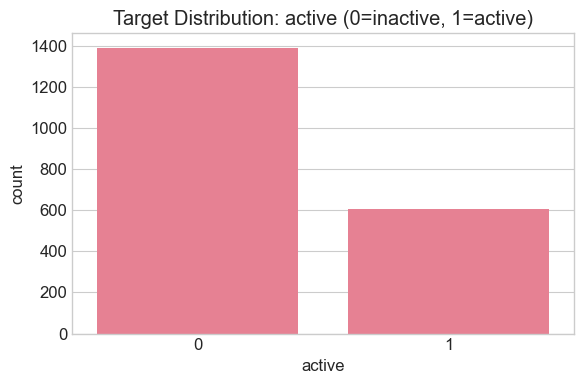

Saved target distribution figure to: c:\Users\KORISNIK\Documents\drug-discovery-virtual-screening\results\figures\00_target_distribution.png

QUALITY ASSESSMENT SUMMARY
Total rows      : 2,000
Total columns   : 17
Missing values  : 3 columns affected
Duplicate rows  : 0
Memory usage    : 0.48 MB


In [6]:
# ============================
# 3. Quality Assessment
# ============================

print("=" * 60)
print("DATA QUALITY ASSESSMENT")
print("=" * 60)

# -------- 3.1 Missing Values --------
print("\n" + "-" * 60)
print("3.1 Missing Values Analysis")
print("-" * 60)

missing_count = df.isna().sum()
missing_percent = (df.isna().mean() * 100)

missing_report = (
    pd.DataFrame({
        "column": missing_count.index,
        "missing_count": missing_count.values,
        "missing_pct": missing_percent.values
    })
    .sort_values("missing_count", ascending=False)
)

missing_nonzero = missing_report[missing_report["missing_count"] > 0]

if missing_nonzero.empty:
    print("No missing values detected in any column.")
else:
    print(f"Columns with missing values: {missing_nonzero.shape[0]}")
    display(missing_nonzero)

# Save full missingness report
missing_path = os.path.join(RESULTS_PATH, "metrics", "00_missing_values_report.csv")
os.makedirs(os.path.dirname(missing_path), exist_ok=True)
missing_report.to_csv(missing_path, index=False)
print("Saved missing values report to:", missing_path)

# -------- 3.2 Duplicate Records --------
print("\n" + "-" * 60)
print("3.2 Duplicate Records Analysis")
print("-" * 60)

duplicate_count = int(df.duplicated().sum())

print("Duplicate rows:", duplicate_count)

if duplicate_count > 0:
    duplicate_rows = df[df.duplicated(keep=False)].sort_values(list(df.columns))
    display(duplicate_rows.head(10))

    dup_path = os.path.join(RESULTS_PATH, "metrics", "00_duplicate_rows_sample.csv")
    duplicate_rows.head(100).to_csv(dup_path, index=False)
    print("Saved duplicate rows sample to:", dup_path)

# -------- 3.3 Target Variable Inspection --------
print("\n" + "-" * 60)
print("3.3 Target Variable (activity) Inspection")
print("-" * 60)

TARGET_COL = "active"

if TARGET_COL not in df.columns:
    raise KeyError(f"Expected target column '{TARGET_COL}' not found in dataset columns.")

value_counts = df[TARGET_COL].value_counts(dropna=False).sort_index()
value_pct = df[TARGET_COL].value_counts(normalize=True, dropna=False).sort_index() * 100

target_summary = pd.DataFrame({
    "value": value_counts.index,
    "count": value_counts.values,
    "percent": value_pct.values
})

display(target_summary)

unique_vals = set(df[TARGET_COL].dropna().unique())
print("Unique target values:", sorted(unique_vals))
print("Target dtype:", df[TARGET_COL].dtype)

if not unique_vals.issubset({0, 1}):
    print("WARNING: Target contains values other than 0 and 1.")

# Target distribution plot (saved)
fig_path = os.path.join(RESULTS_PATH, "figures", "00_target_distribution.png")
os.makedirs(os.path.dirname(fig_path), exist_ok=True)

plt.figure(figsize=(6, 4))
sns.countplot(x=TARGET_COL, data=df)
plt.title("Target Distribution: active (0=inactive, 1=active)")
plt.xlabel("active")
plt.ylabel("count")
plt.tight_layout()
plt.savefig(fig_path, dpi=200)
plt.show()

print("Saved target distribution figure to:", fig_path)

# -------- Summary --------
print("\n" + "=" * 60)
print("QUALITY ASSESSMENT SUMMARY")
print("=" * 60)
print(f"Total rows      : {len(df):,}")
print(f"Total columns   : {df.shape[1]}")
print(f"Missing values  : {'None' if missing_nonzero.empty else f'{missing_nonzero.shape[0]} columns affected'}")
print(f"Duplicate rows  : {duplicate_count}")
print(f"Memory usage    : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("=" * 60)

## Conclusion

The raw Drug Discovery Virtual Screening dataset was successfully loaded and inspected.

**Key observations:**
- The dataset contains 2,000 samples and 17 features.
- No duplicate records were detected.
- Three physicochemical descriptors (`logp`, `hydrophobicity`, `polar_surface_area`) contain a small proportion (~3%) of missing values.
- The target variable (`active`) is binary and moderately imbalanced, with a higher proportion of inactive compounds (69.6% vs 30.4%).

**What we did NOT do:**
- No preprocessing or modeling was performed in this notebook.
- All identified data quality issues will be addressed in the next stage of the pipeline.

**Next step:** Exploratory data analysis and preprocessing (`01_eda_and_preprocessing.ipynb`)